In [1]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.dpi'] = 3000
sc.settings.verbosity = 3
sc.set_figure_params()
sc.logging.print_versions()
#results_file = './write/results.h5ad'
import warnings
warnings.filterwarnings('ignore')


%load_ext autoreload
%autoreload 2 

scanpy==1.4.4.post1 anndata==0.7.4 umap==0.3.10 numpy==1.19.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.2 louvain==0.6.1


In [2]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

In [3]:
pvn = sc.read('./../../data/processed/PVN_renamed_latest.h5ad')
adrenal = sc.read('./../../data/processed/adrenal_renamed_latest.h5ad')
pituitary = sc.read('./../../data/processed/pituitary_renamed_latest.h5ad')

# S1

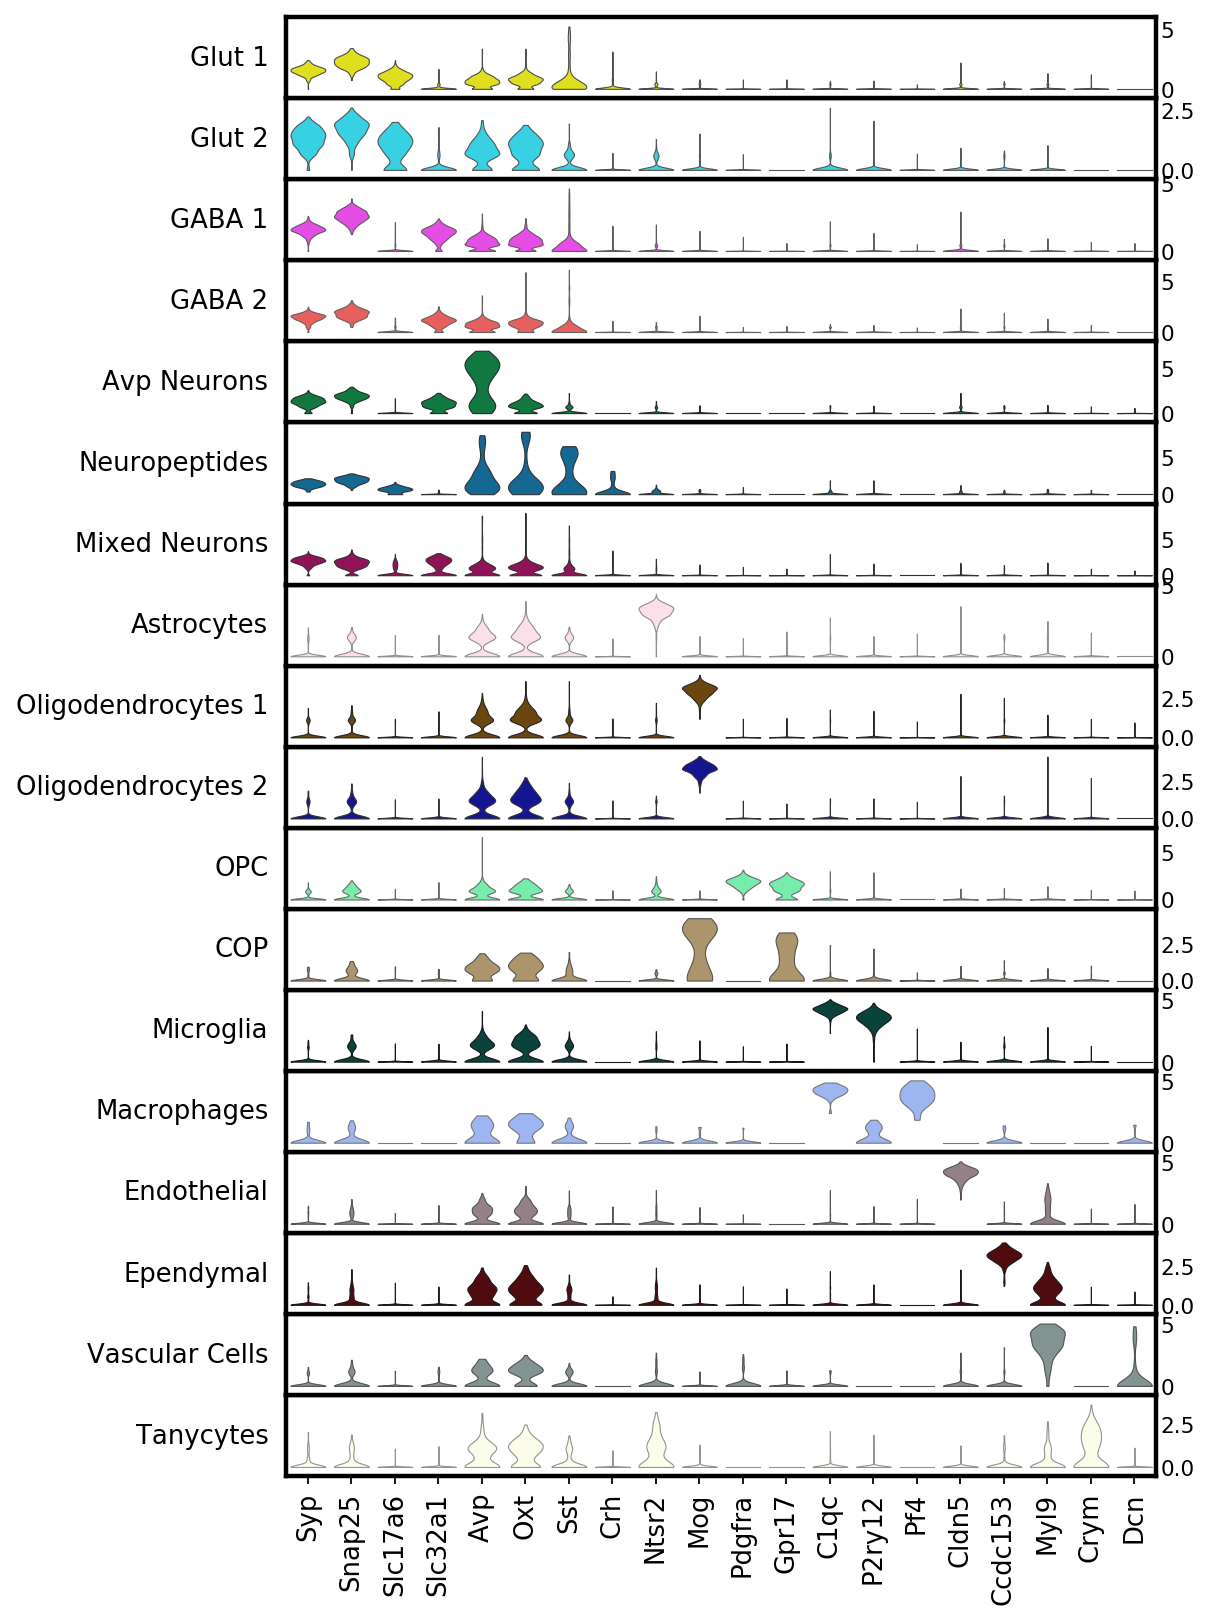

In [4]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.ymargin'] = 0.15
fig = sc.pl.stacked_violin(
    pvn,
    var_names=['Syp',
               'Snap25',
               'Slc17a6',
               'Slc32a1',
               'Avp',
               'Oxt',
               'Sst',
               'Crh',
               'Ntsr2',
               'Mog',
               'Pdgfra',
               'Gpr17',
               'C1qc',
               'P2ry12',
               'Pf4',
               'Cldn5',
               'Ccdc153',
               'Myl9',
               'Crym',
               'Dcn'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    row_palette=pvn.uns['louvain_r1_colors'],
    figsize=(7.25, 12),
    save='pvn.svg'
)


# S2

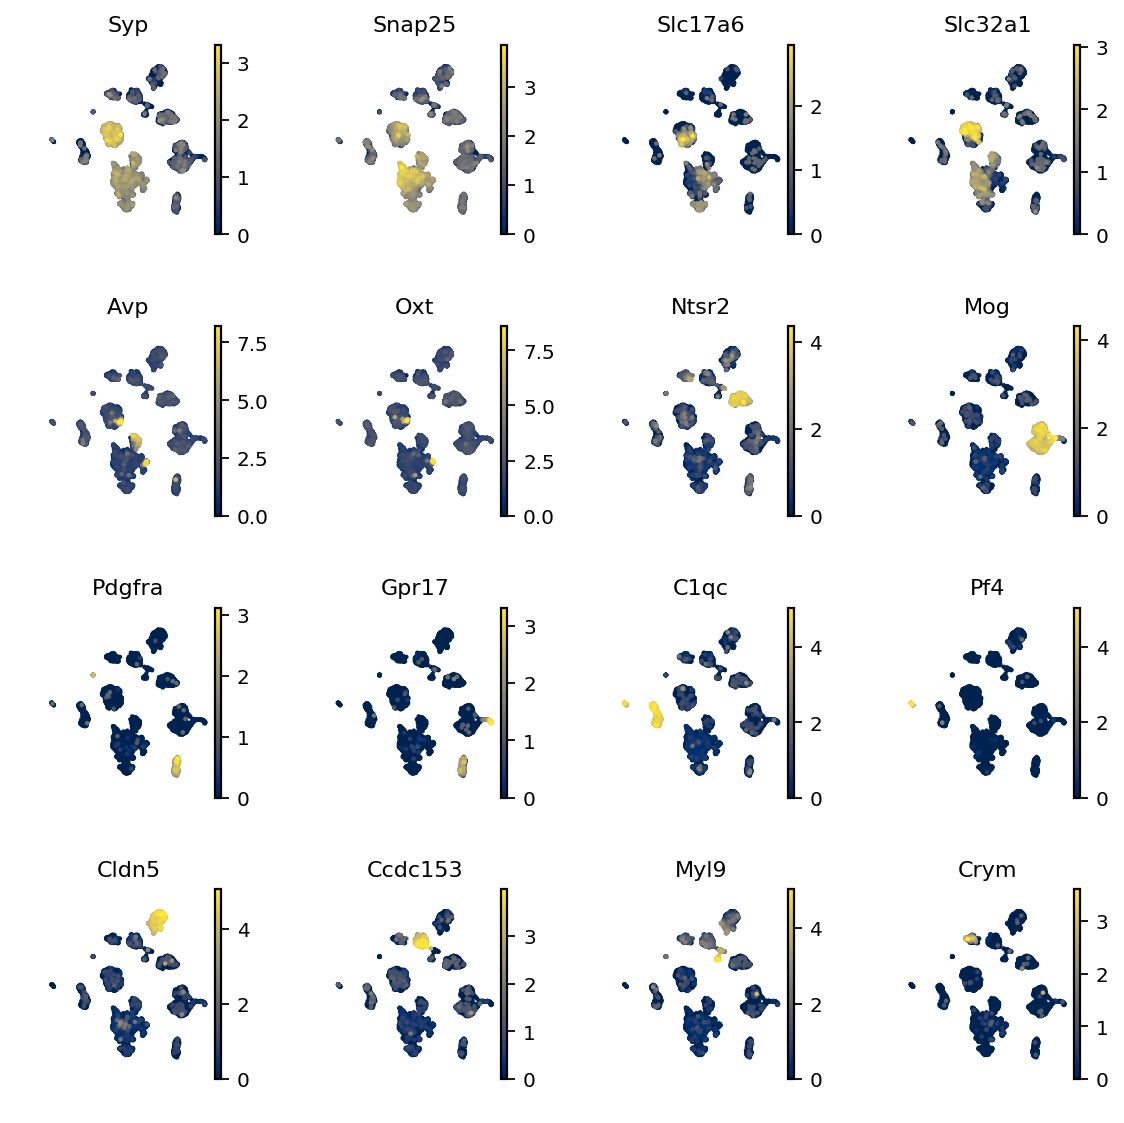

In [5]:
plt.rcParams['axes.linewidth'] = 1
genes = [
    'Syp',
    'Snap25', 
    'Slc17a6',
    'Slc32a1',
    'Avp',
    'Oxt',
    'Ntsr2',
    'Mog',
    'Pdgfra',
    'Gpr17',
    'C1qc',
    'Pf4',
    'Cldn5',
    'Ccdc153',
    'Myl9',
    'Crym'
]

fig, ax = plt.subplots(4, 4, figsize=(7.25, 7.25))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(pvn, color=gene, show=False, frameon=False, ax=ax[i], cmap='cividis')
fig.tight_layout()

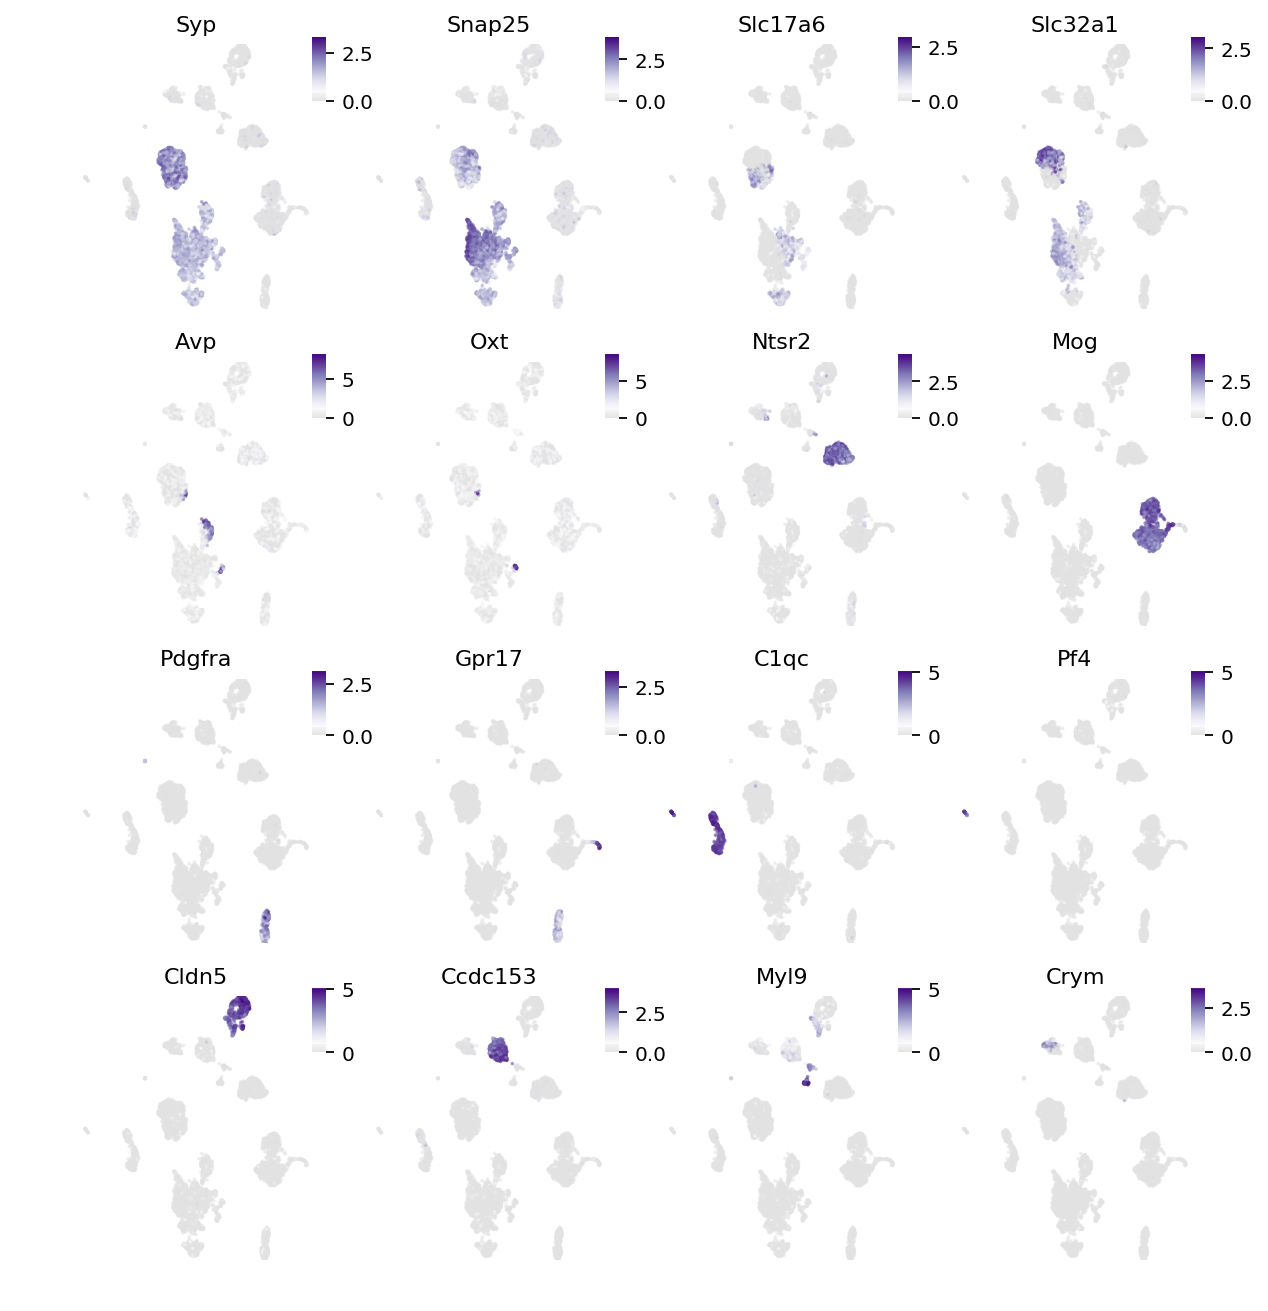

In [7]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

colors2 = plt.cm.Purples(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colorsComb = np.vstack([colors3, colors2])
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

genes = [
    'Syp',
    'Snap25', 
    'Slc17a6',
    'Slc32a1',
    'Avp',
    'Oxt',
    'Ntsr2',
    'Mog',
    'Pdgfra',
    'Gpr17',
    'C1qc',
    'Pf4',
    'Cldn5',
    'Ccdc153',
    'Myl9',
    'Crym'
]

fig, ax = plt.subplots(4, 4, figsize=(9, 10))
ax=ax.flatten()
for i, gene in enumerate(genes):
    p = ax[i].scatter(
        pvn.obsm['X_umap'][:, 0],
        pvn.obsm['X_umap'][:, 1],
        c=pvn.raw.X[:, pvn.var_names==gene].squeeze(),
        cmap=mymap,
        s=0.5,
        alpha=0.5
    )
    ax[i].axis('off')
    ax[i].set_title(gene)
    pos1 = ax[i].get_position()
    cbax = fig.add_axes([pos1.x0+0.165, pos1.y0+0.13, 0.01, 0.04])
    plt.colorbar(p, cax=cbax)
fig.savefig('./figures/umap_markers_pvn.png', bbox_inches='tight', dpi=1200)

# S3

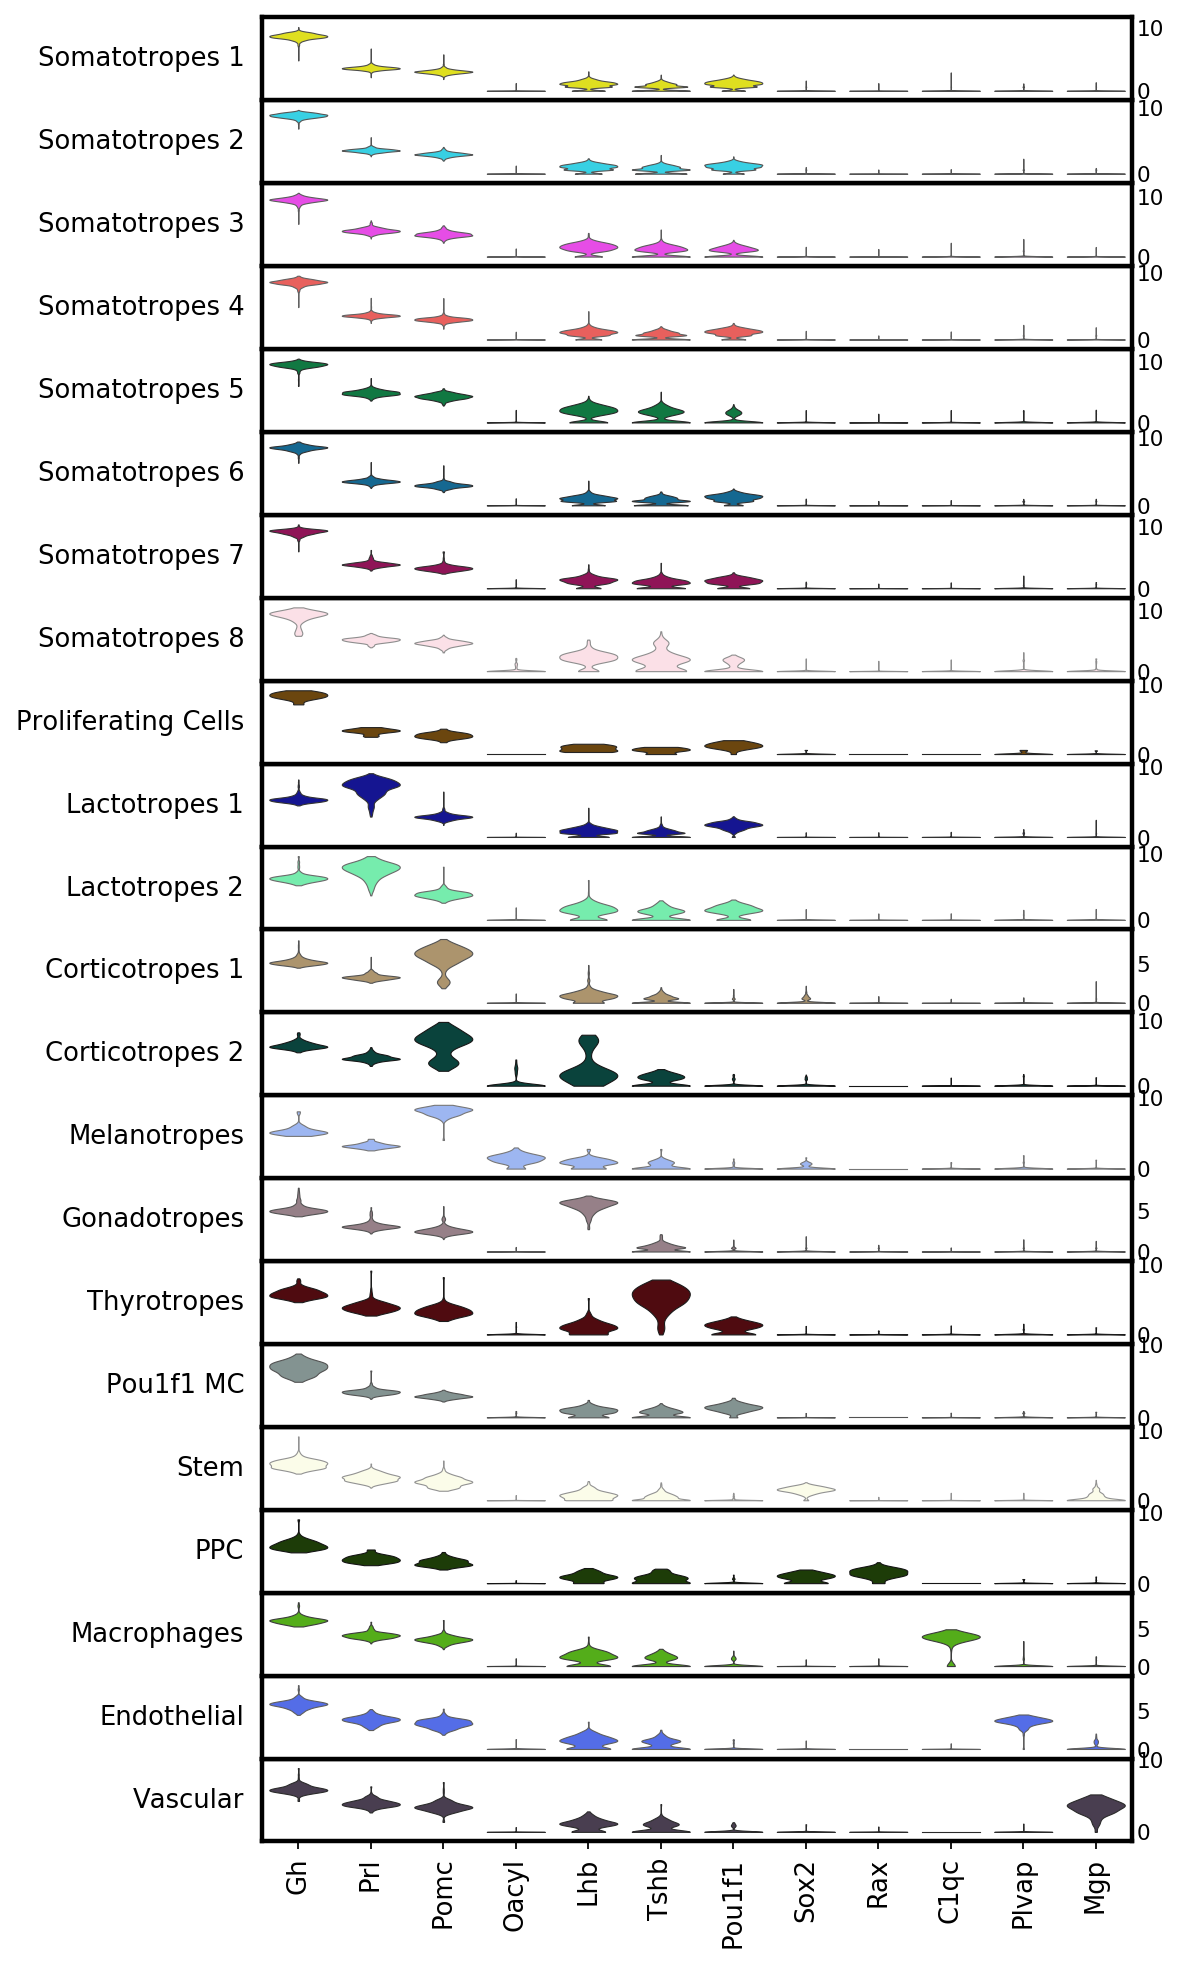

In [7]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.ymargin'] = 0.15
sc.pl.stacked_violin(
    pituitary,
    var_names=['Gh',
               'Prl',
               'Pomc',
               'Oacyl',
               'Lhb',
               'Tshb',
               'Pou1f1',
               'Sox2',
               'Rax',
               'C1qc',
               'Plvap',
               'Mgp'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    figsize=(7.25, 15),
    row_palette=pituitary.uns['louvain_r1_colors'],
    save='pituitary.svg'
)

# S4

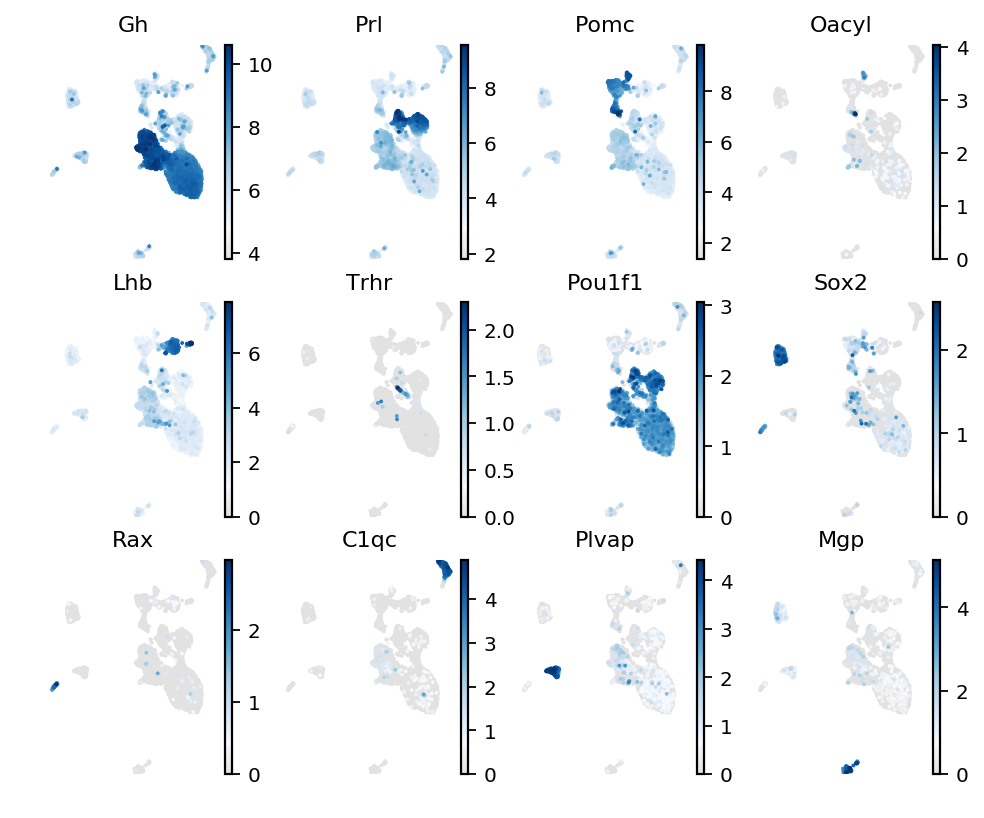

In [8]:
plt.rcParams['figure.figsize'] = (7.25, 7.25)
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['axes.ymargin'] = 0

colors2 = plt.cm.Blues(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colorsComb = np.vstack([colors3, colors2])
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

genes = [
    'Gh',
    'Prl', 
    'Pomc',
    'Oacyl',
    'Lhb',
    'Trhr',
    'Pou1f1',
    'Sox2',
    'Rax',
    'C1qc',
    'Plvap',
    'Mgp'
]

fig, ax = plt.subplots(3, 4, figsize=(7.25, 6))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(pituitary, color=gene, show=False, frameon=False, ax=ax[i], cmap=mymap)

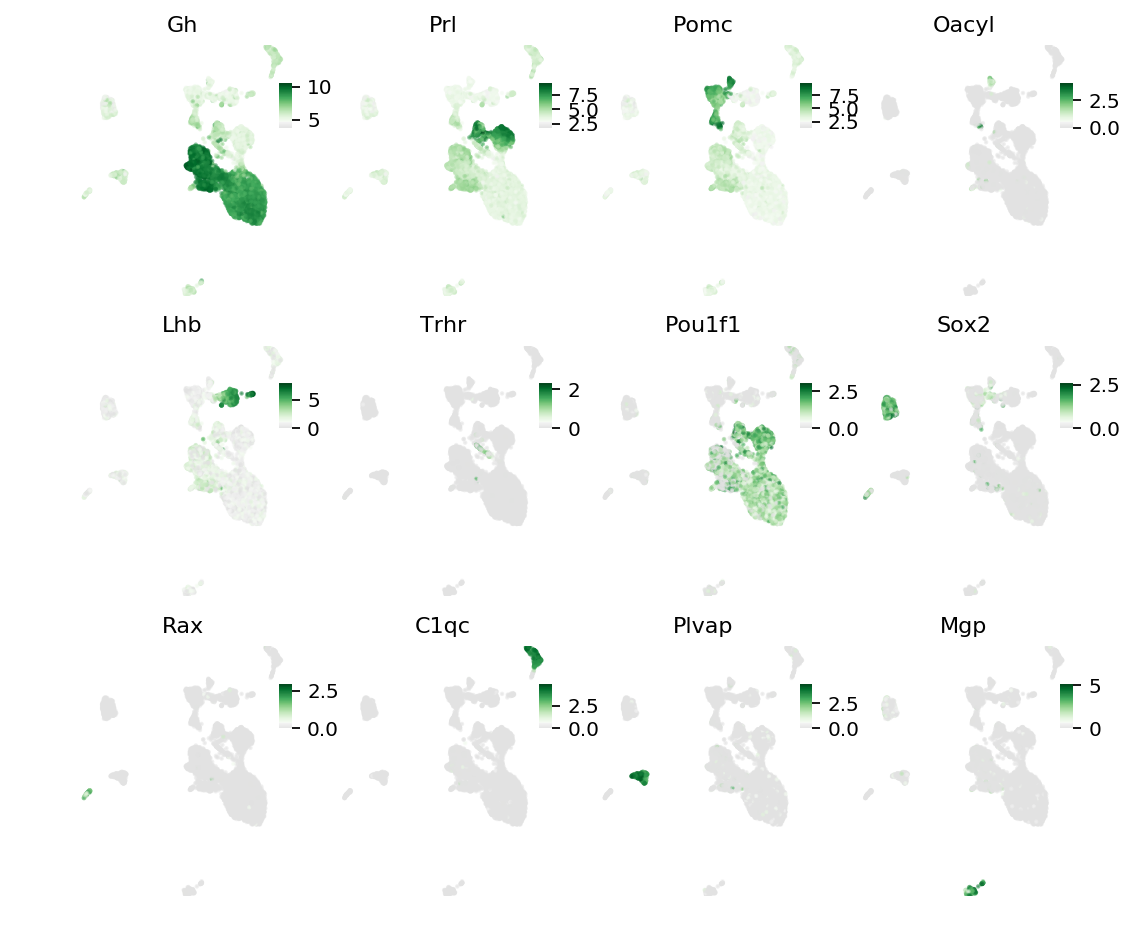

In [9]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

colors2 = plt.cm.Greens(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colorsComb = np.vstack([colors3, colors2])
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

genes = [
    'Gh',
    'Prl', 
    'Pomc',
    'Oacyl',
    'Lhb',
    'Trhr',
    'Pou1f1',
    'Sox2',
    'Rax',
    'C1qc',
    'Plvap',
    'Mgp'
]

fig, ax = plt.subplots(3, 4, figsize=(8, 7))
ax=ax.flatten()
for i, gene in enumerate(genes):
    p = ax[i].scatter(
        pituitary.obsm['X_umap'][:, 0],
        pituitary.obsm['X_umap'][:, 1],
        c=pituitary.raw.X[:, pituitary.var_names==gene].squeeze(),
        cmap=mymap,
        s=1,
        alpha=0.5
    )
    ax[i].axis('off')
    ax[i].set_title(gene)
    pos1 = ax[i].get_position()
    cbax = fig.add_axes([pos1.x0+0.16, pos1.y0+0.15, 0.01, 0.04])
    plt.colorbar(p, cax=cbax)
fig.savefig('./figures/umap_markers_pituitary.png', bbox_inches='tight', dpi=1200)

# S5

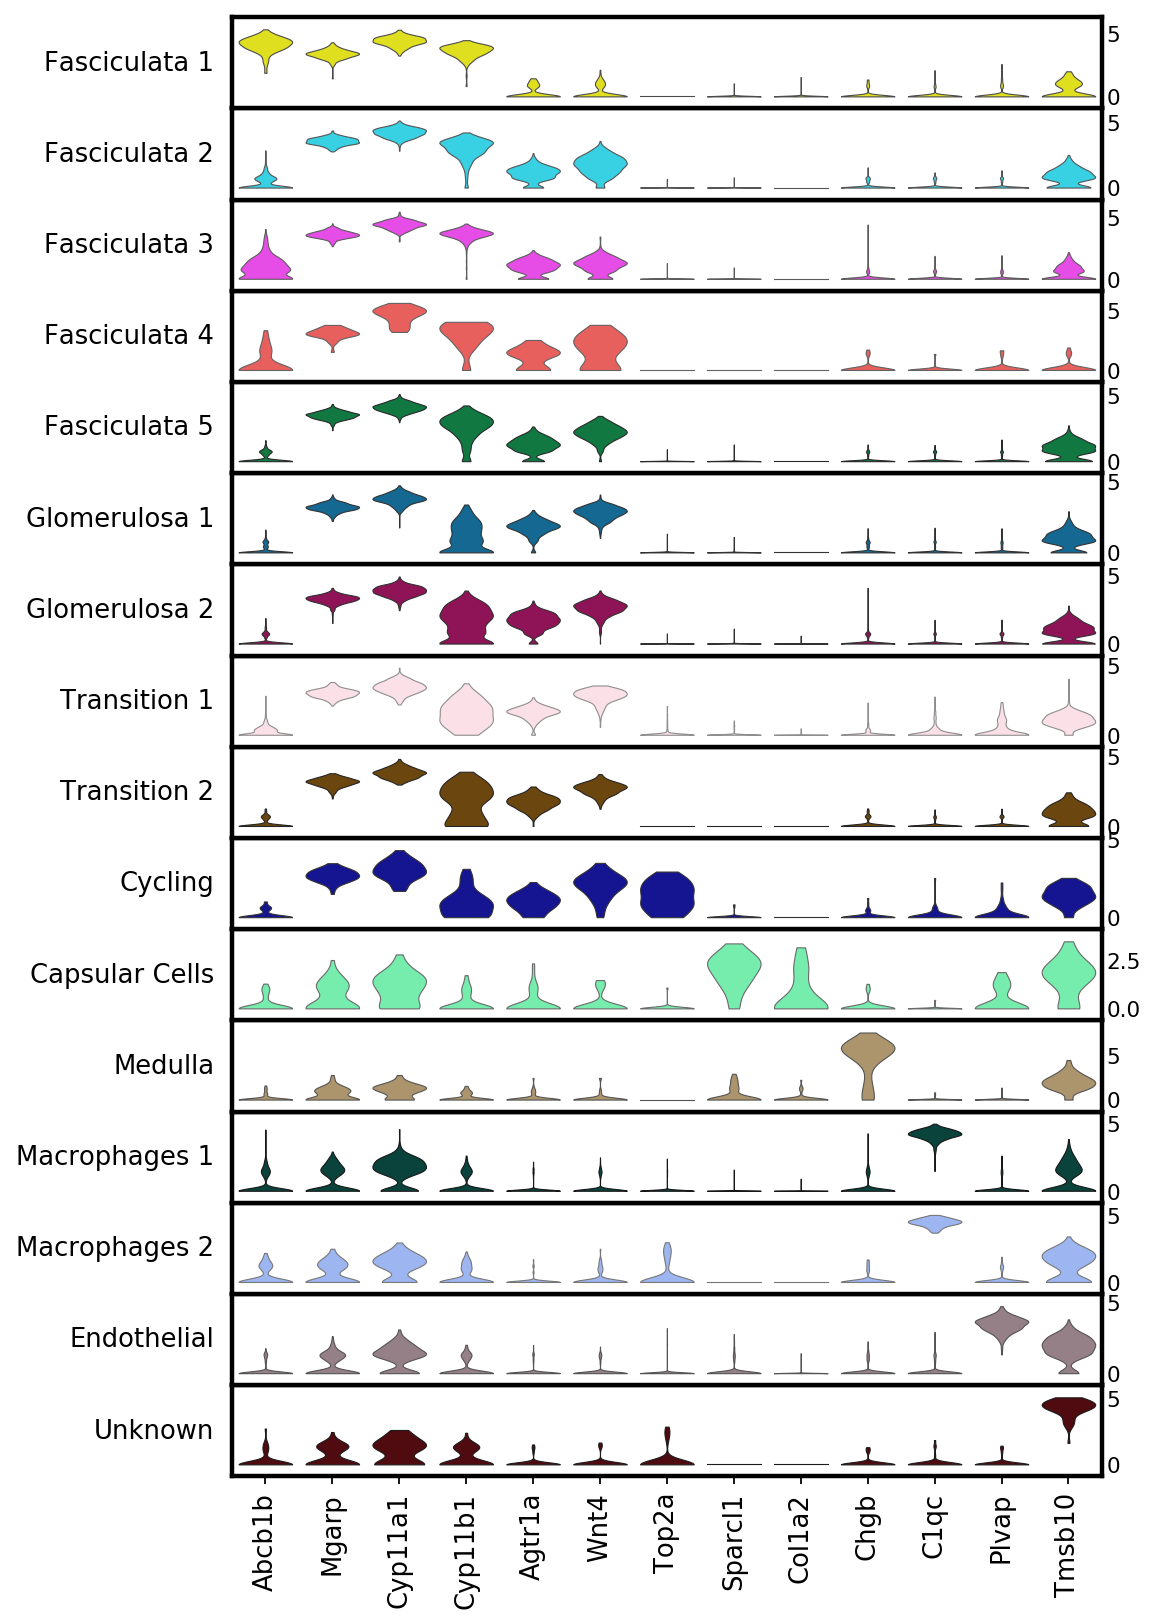

In [10]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.ymargin'] = 0.18
sc.pl.stacked_violin(
    adrenal,
    var_names=['Abcb1b',
               'Mgarp',
               'Cyp11a1',
               'Cyp11b1',
               'Agtr1a', 
               'Wnt4',
               'Top2a',
               'Sparcl1',
               'Col1a2', 
               'Chgb',
               'C1qc',
               'Plvap', 
               'Tmsb10'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    figsize=(7.25, 12),
    row_palette=adrenal.uns['louvain_r1_colors'],
    save='adrenal.svg'
)

# S6

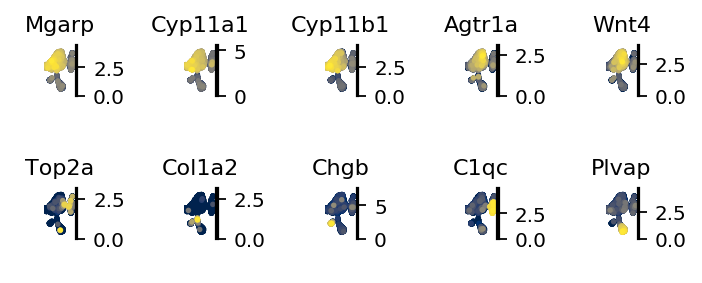

In [11]:
plt.rcParams['figure.figsize'] = (4.6, 4.6)
plt.rcParams['axes.linewidth'] = 1
genes = [
    'Mgarp',
    'Cyp11a1', 
    'Cyp11b1',
    'Agtr1a',
    'Wnt4',
    'Top2a',
    'Col1a2',
    'Chgb',
    'C1qc',
    'Plvap'
]

fig, ax = plt.subplots(2, 5, figsize=(4.6, 2))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(adrenal, color=gene, show=False, frameon=False, ax=ax[i], cmap='cividis')
fig.tight_layout()

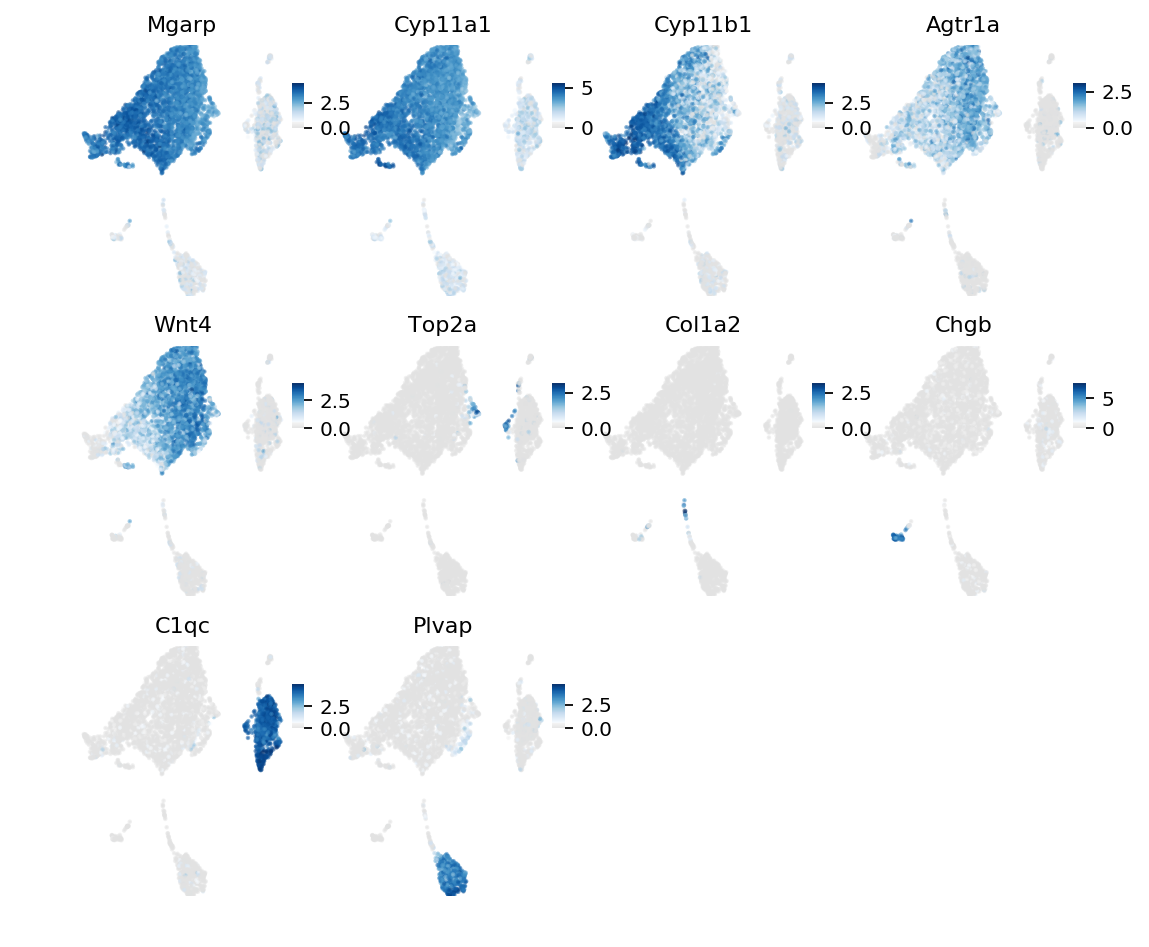

In [12]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

colors2 = plt.cm.Blues(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colorsComb = np.vstack([colors3, colors2])
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

genes = [
    'Mgarp',
    'Cyp11a1', 
    'Cyp11b1',
    'Agtr1a',
    'Wnt4',
    'Top2a',
    'Col1a2',
    'Chgb',
    'C1qc',
    'Plvap'
]

fig, ax = plt.subplots(3, 4, figsize=(8, 7))
ax=ax.flatten()
for i, gene in enumerate(genes):
    p = ax[i].scatter(
        adrenal.obsm['X_umap'][:, 0],
        adrenal.obsm['X_umap'][:, 1],
        c=adrenal.raw.X[:, adrenal.var_names==gene].squeeze(),
        cmap=mymap,
        s=1,
        alpha=0.5
    )
    ax[i].axis('off')
    ax[i].set_title(gene)
    pos1 = ax[i].get_position()
    cbax = fig.add_axes([pos1.x0+0.17, pos1.y0+0.15, 0.01, 0.04])
    plt.colorbar(p, cax=cbax)
ax[-1].axis('off')
ax[-2].axis('off')
fig.savefig('./figures/umap_markers_adrenal.png', bbox_inches='tight', dpi=1200)

# S7

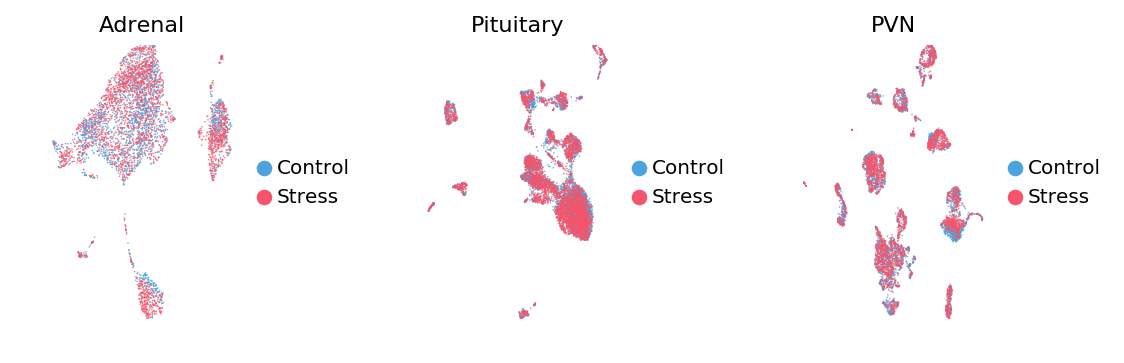

In [13]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

fig, ax = plt.subplots(1, 3, figsize=(7.25, 2.5))
sc.pl.umap(adrenal, color='condition', frameon=False, show=False, ax=ax[0], size=2, alpha=0.8, palette=['#4ca3dd', '#f6546a'])
ax[0].set_title('Adrenal')
#ax[0].get_legend().remove()
sc.pl.umap(pituitary, color='condition', frameon=False, show=False, ax=ax[1], size=2, alpha=0.8, palette=['#4ca3dd', '#f6546a'])
ax[1].set_title('Pituitary')
#ax[1].get_legend().remove()
sc.pl.umap(pvn, color='condition', frameon=False, show=False, ax=ax[2], size=2, alpha=0.8, palette=['#4ca3dd', '#f6546a'])
ax[2].set_title('PVN')
#ax[2].get_legend().remove()
plt.tight_layout()
fig.savefig('./figures/umap_stress.png', bbox_inches='tight', dpi=1200)

# S8

In [14]:
sc.tl.rank_genes_groups(adrenal, groupby='louvain_r1', key_added='rank_genes_r1')

ranking genes
    finished: added to `.uns['rank_genes_r1']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


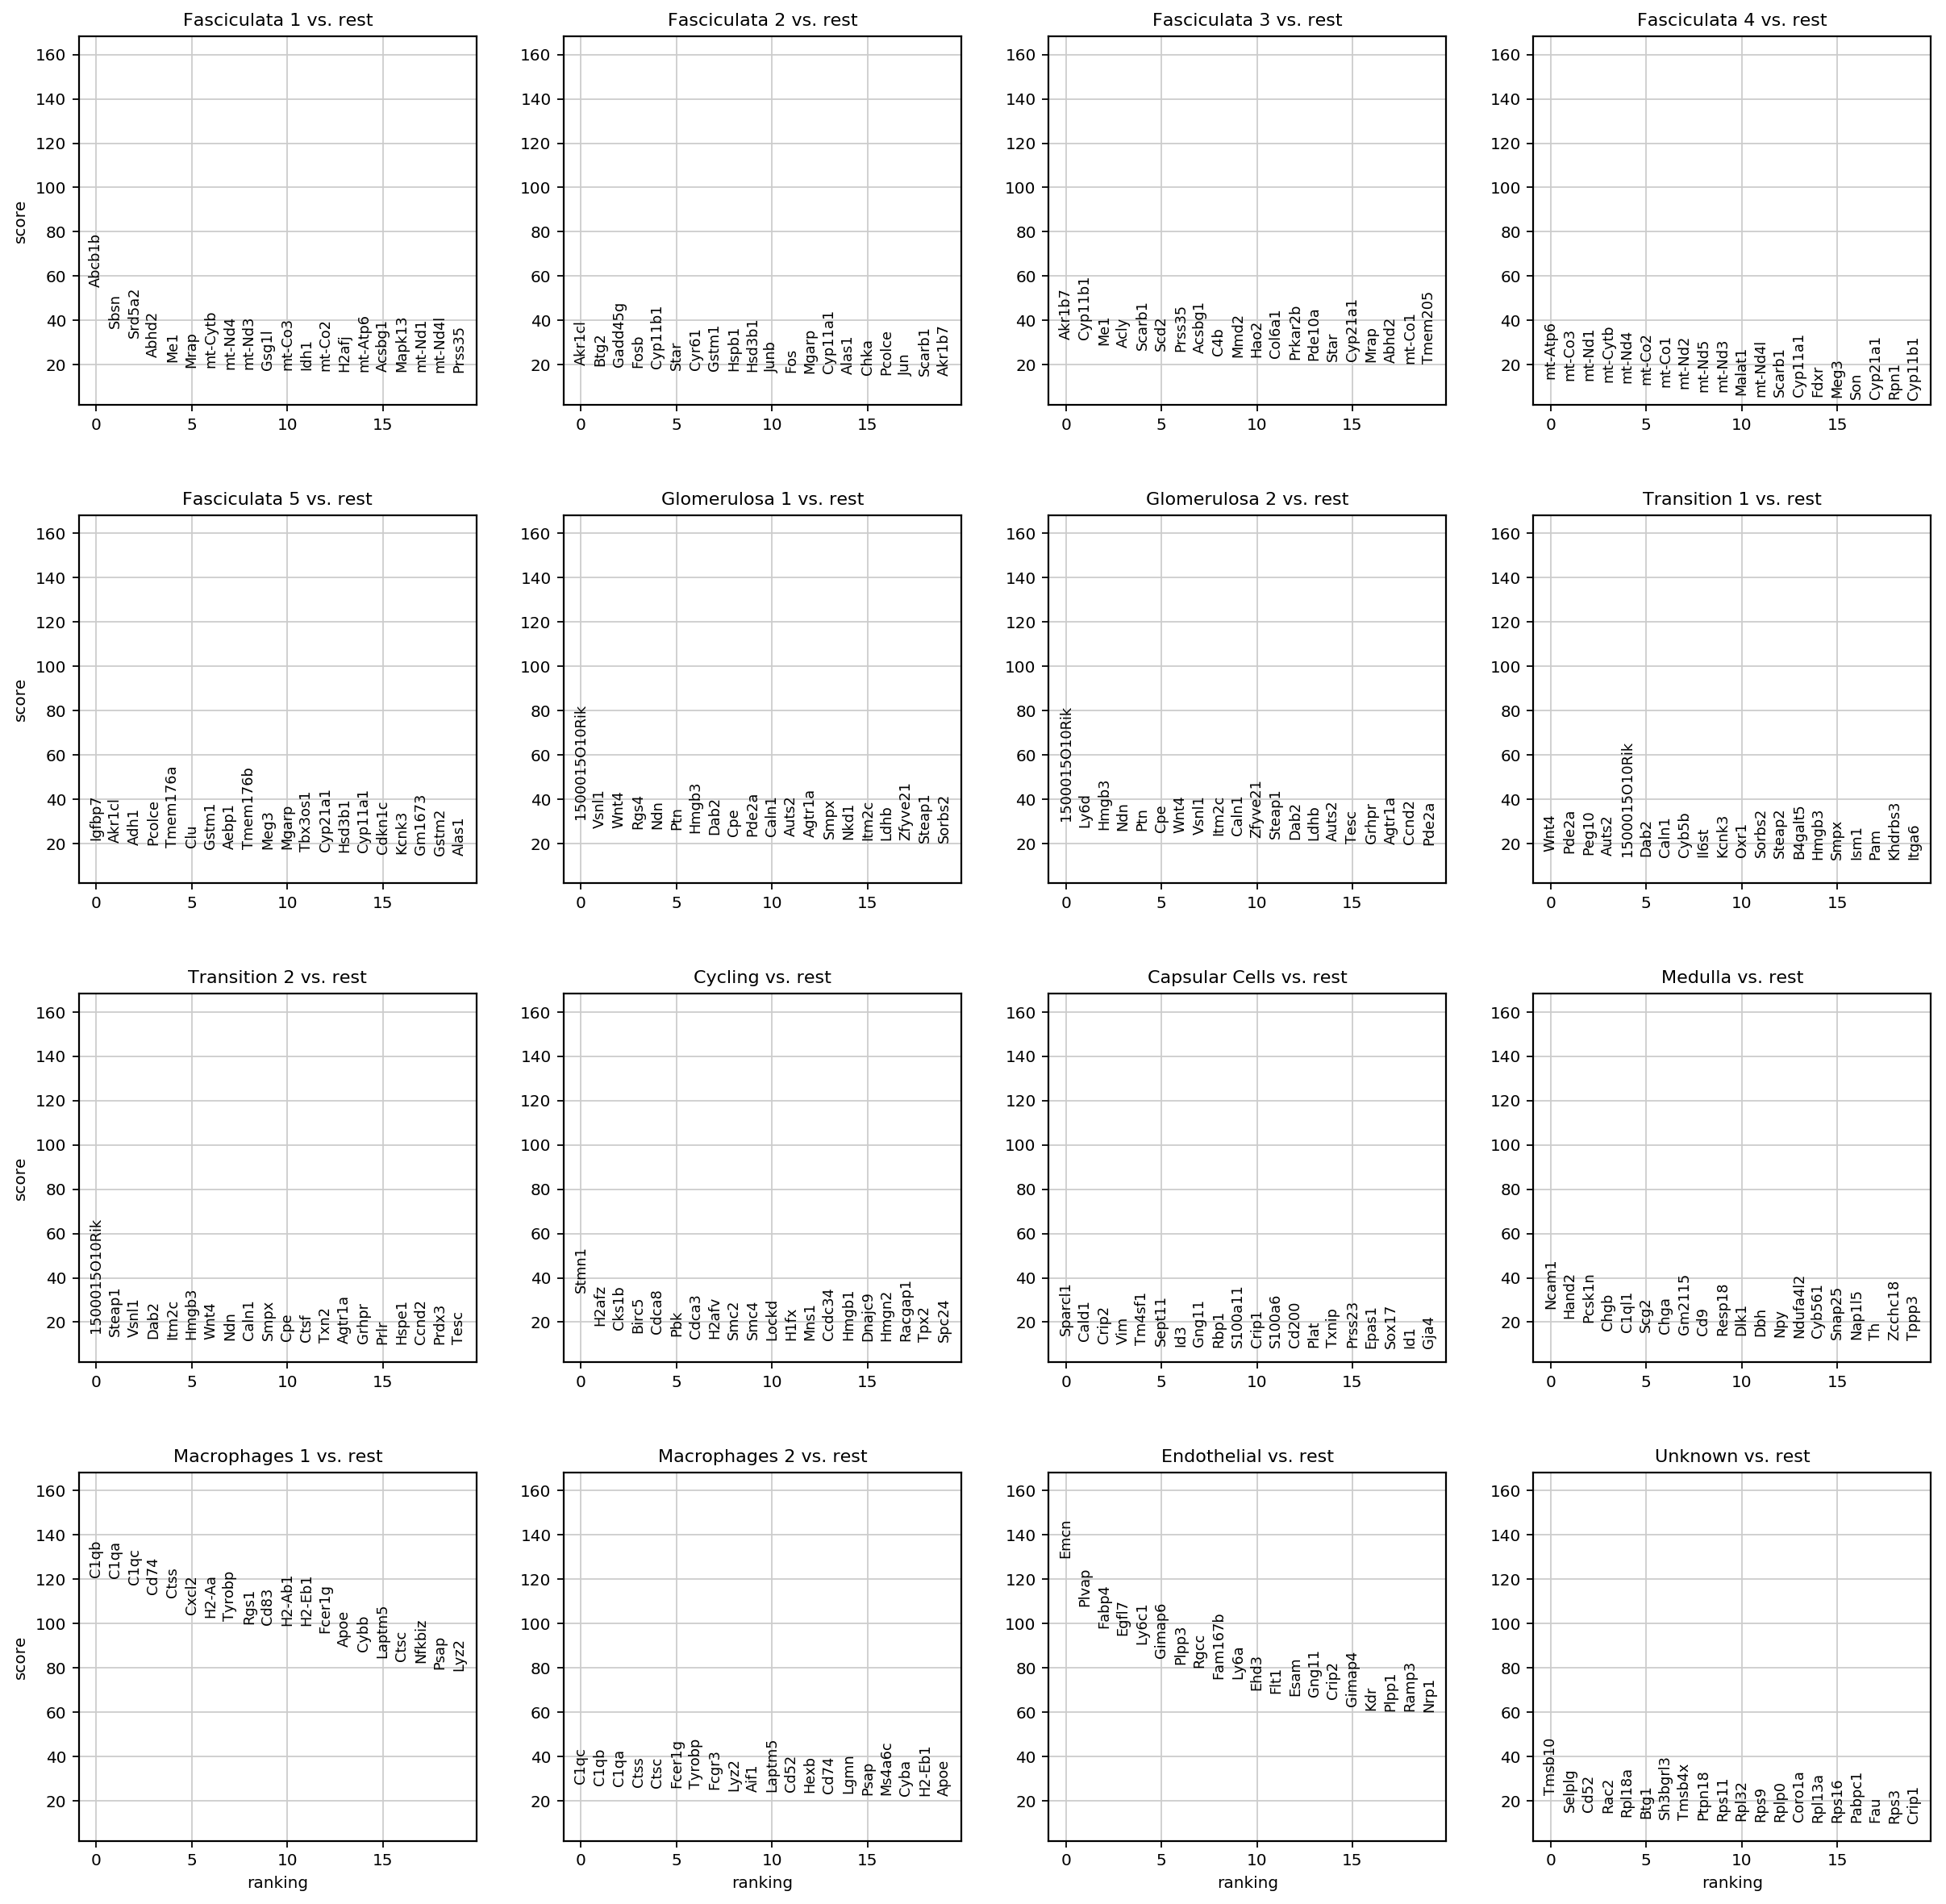

In [23]:
plt.rcParams['axes.linewidth'] = 1
sc.pl.rank_genes_groups(adrenal, key='rank_genes_r1')

# S9

In [16]:
adata = pvn.concatenate([adrenal, pituitary], batch_key='tissue')

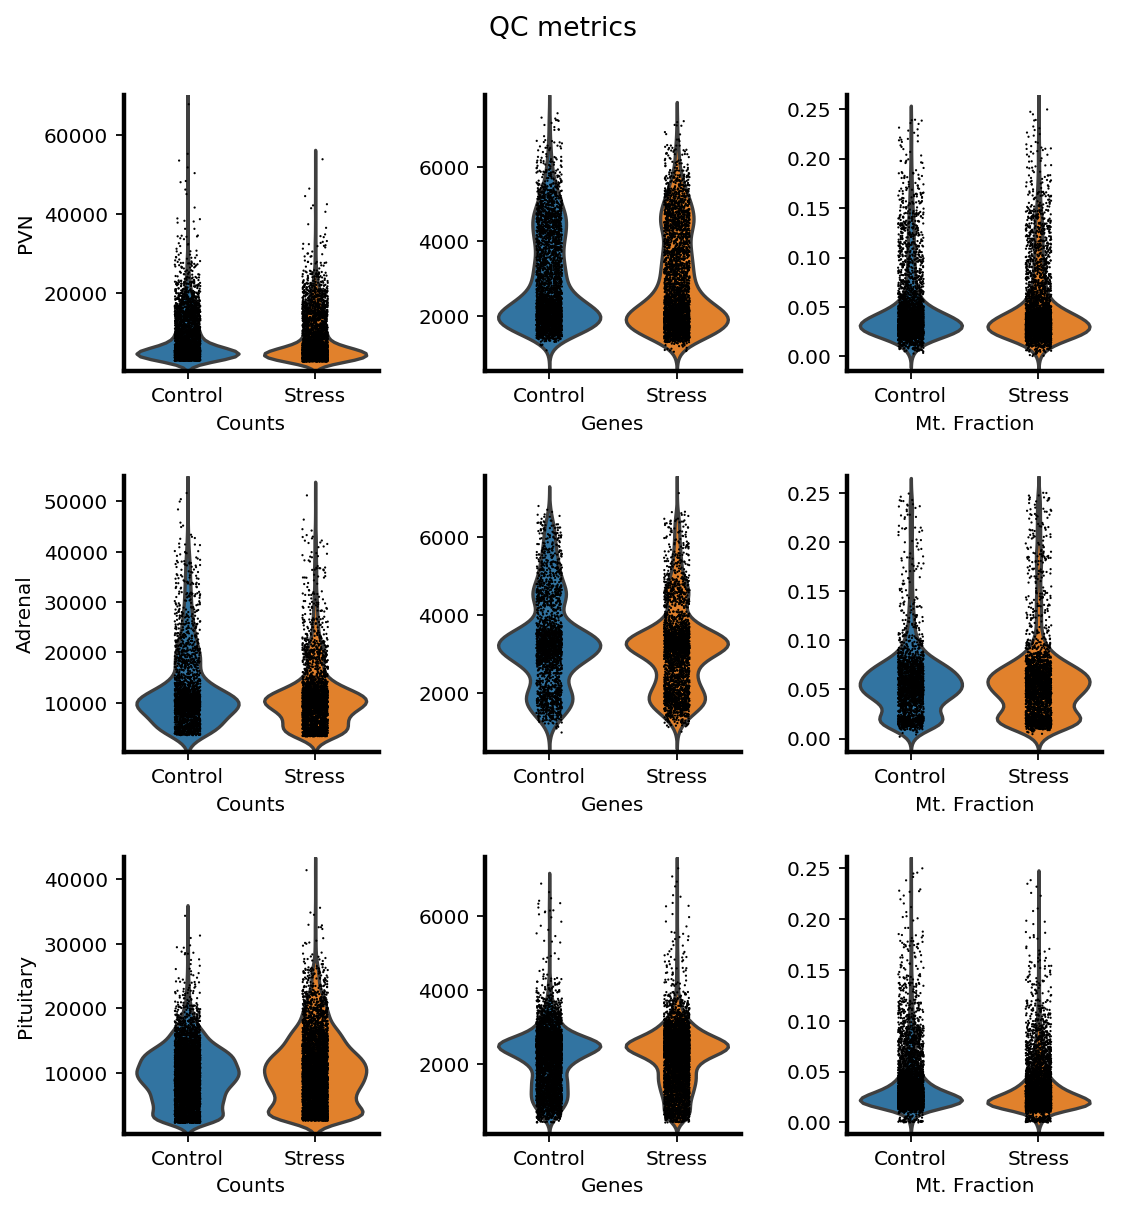

In [17]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

fig, ax = plt.subplots(3, 3, figsize=(7.25, 8))
sc.pl.violin(pvn, keys='n_counts', groupby='condition', show=False, ax=ax[0, 0])
ax[0, 0].set_ylabel('PVN')
ax[0, 0].set_xlabel('Counts')
ax[0, 0].grid('off')
sc.pl.violin(pvn, keys='n_genes', groupby='condition', show=False, ax=ax[0, 1])
ax[0, 1].set_ylabel('')
ax[0, 1].set_xlabel('Genes')
ax[0, 1].grid('off')
sc.pl.violin(pvn, keys='mt_frac', groupby='condition', show=False, ax=ax[0, 2])
ax[0, 2].set_ylabel('')
ax[0, 2].set_xlabel('Mt. Fraction')
ax[0, 2].grid('off')
sc.pl.violin(adrenal, keys='n_counts', groupby='condition', show=False, ax=ax[1, 0])
ax[1, 0].set_ylabel('Adrenal')
ax[1, 0].set_xlabel('Counts')
ax[1, 0].grid('off')
sc.pl.violin(adrenal, keys='n_genes', groupby='condition', show=False, ax=ax[1, 1])
ax[1, 1].set_ylabel('')
ax[1, 1].set_xlabel('Genes')
ax[1, 1].grid('off')
sc.pl.violin(adrenal, keys='mt_frac', groupby='condition', show=False, ax=ax[1, 2])
ax[1, 2].set_ylabel('')
ax[1, 2].set_xlabel('Mt. Fraction')
ax[1, 2].grid('off')
sc.pl.violin(pituitary, keys='n_counts', groupby='condition', show=False, ax=ax[2, 0])
ax[2, 0].set_ylabel('Pituitary')
ax[2, 0].set_xlabel('Counts')
ax[2, 0].grid('off')
sc.pl.violin(pituitary, keys='n_genes', groupby='condition', show=False, ax=ax[2, 1])
ax[2, 1].set_ylabel('')
ax[2, 1].set_xlabel('Genes')
ax[2, 1].grid('off')
sc.pl.violin(pituitary, keys='mt_frac', groupby='condition', show=False, ax=ax[2, 2])
ax[2, 2].set_ylabel('')
ax[2, 2].grid('off')
ax[2, 2].set_xlabel('Mt. Fraction')
sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("QC metrics")
fig.savefig('./figures/qc.svg', bbox_inches='tight')

In [18]:
gr_index = (pvn.X[:, pvn.var_names == 'Nr3c1'] > 0.1).squeeze()
pvn_gr = pvn[gr_index].copy()
df_pvn = pd.DataFrame({'exp': pvn_gr.raw.X[:, pvn_gr.var_names=='Nr3c1'].squeeze(), 'condition': pvn_gr.obs.condition, 'louvain': pvn_gr.obs.louvain_r1})

gr_index = (pituitary.X[:, pituitary.var_names == 'Nr3c1'] > 0.1).squeeze()
pituitary_gr = pituitary[gr_index].copy()
df_pituitary = pd.DataFrame({'exp': pituitary_gr.raw.X[:, pituitary_gr.var_names=='Nr3c1'].squeeze(), 'condition': pituitary_gr.obs.condition, 'louvain': pituitary_gr.obs.louvain_r1})

gr_index = (adrenal.X[:, adrenal.var_names == 'Nr3c1'] > 0.1).squeeze()
adrenal_gr = adrenal[gr_index].copy()
df_adrenal = pd.DataFrame({'exp': adrenal_gr.raw.X[:, adrenal_gr.var_names=='Nr3c1'].squeeze(), 'condition': adrenal_gr.obs.condition, 'louvain': adrenal_gr.obs.louvain_r1})

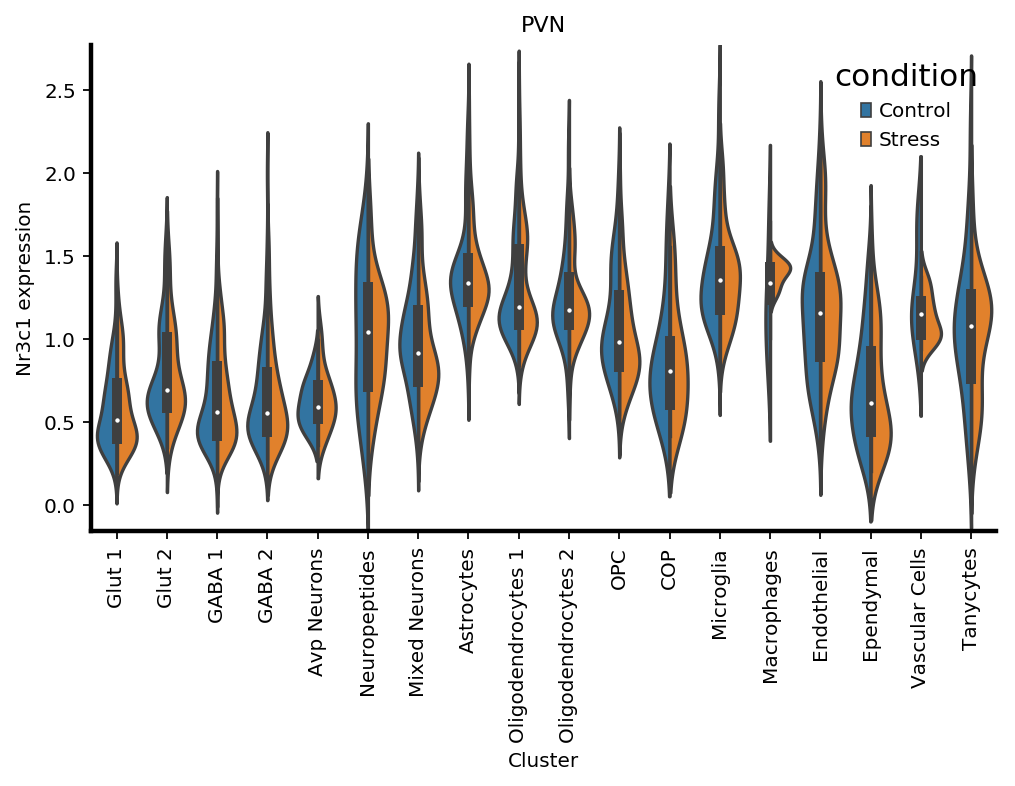

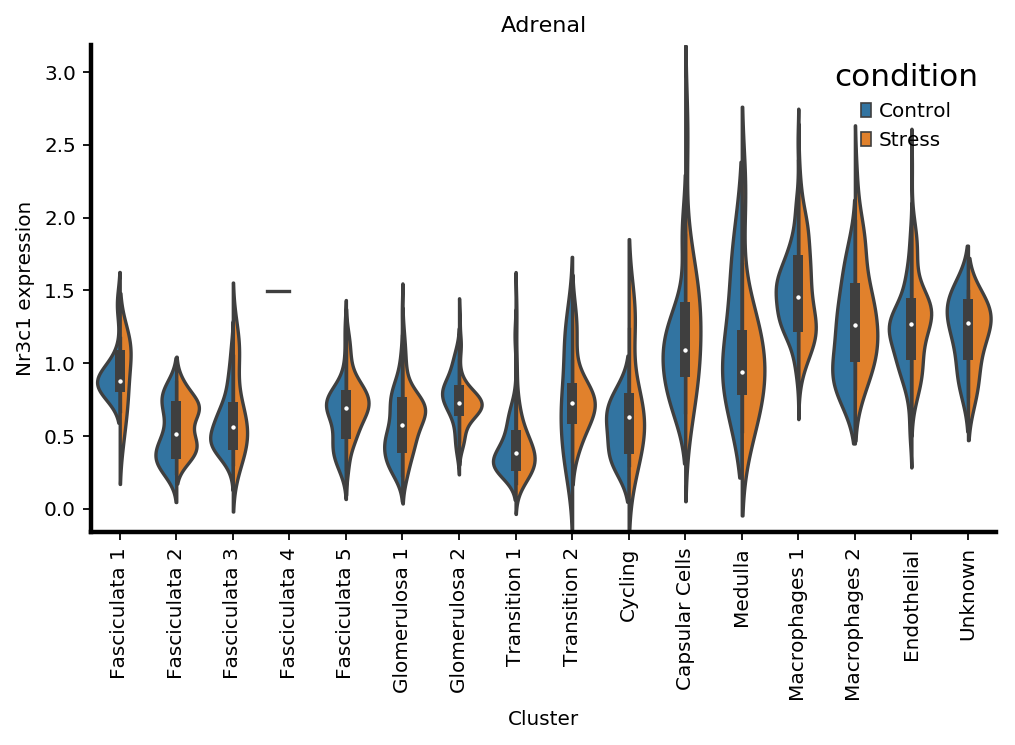

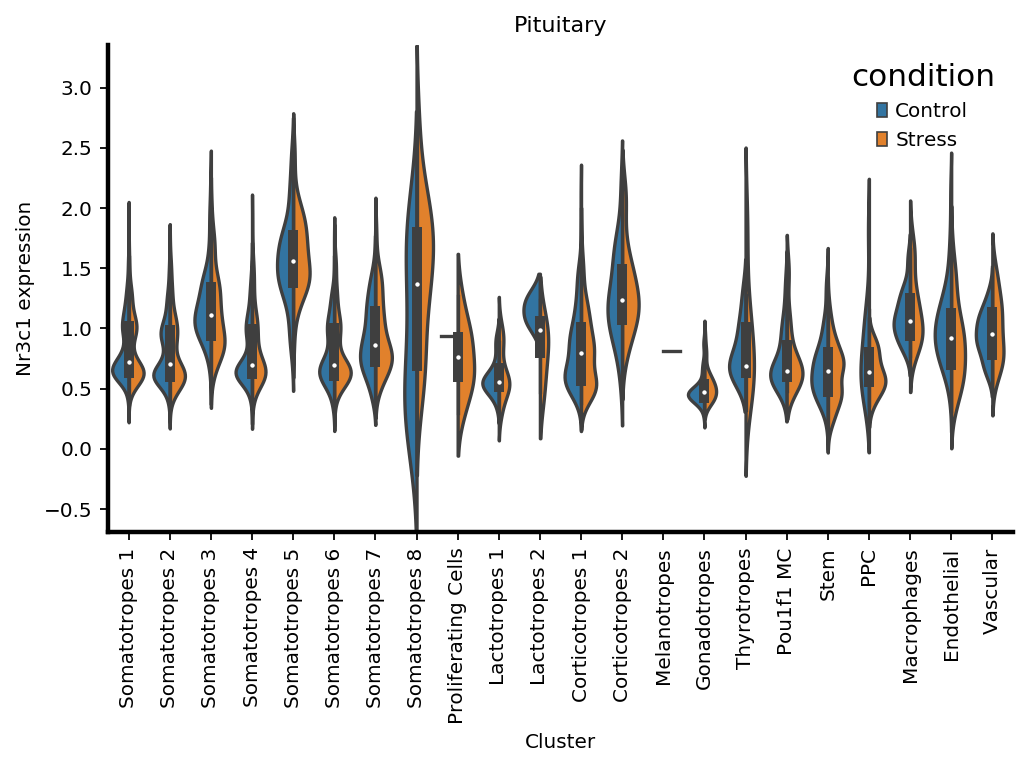

In [24]:
plt.rcParams['legend.framealpha'] = 0
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.ymargin'] = 0

fig, ax = plt.subplots(1, 1, figsize=(7.25,4))
sns.violinplot(x='louvain', y='exp', hue='condition', data=df_pvn, orient='v', split='True', ax=ax)
ax.grid('off')
ax.set_title('PVN')
ax.set_ylabel('Nr3c1 expression')
ax.set_xlabel('Cluster')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
sns.despine()
fig.savefig('./figures/pvn_nr3c1.svg', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.25, 4))
sns.violinplot(x='louvain', y='exp', hue='condition', data=df_adrenal, orient='v', split='True', ax=ax)
ax.grid('off')
ax.set_title('Adrenal')
ax.set_ylabel('Nr3c1 expression')
ax.set_xlabel('Cluster')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
sns.despine()
fig.savefig('./figures/adrenal_nr3c1.svg', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.25, 4))
sns.violinplot(x='louvain', y='exp', hue='condition', data=df_pituitary, orient='v', split='True', ax=ax)
ax.grid('off')
ax.set_title('Pituitary')
ax.set_ylabel('Nr3c1 expression')
ax.set_xlabel('Cluster')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
sns.despine()
fig.savefig('./figures/pituitary_nr3c1.svg', bbox_inches='tight')